<a href="https://colab.research.google.com/github/mikiya2014/My-projects/blob/main/Project_Image_Classification_Trump_vs_Biden_Widgets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trump vs. Biden ConvNet Binary Classification with widgets


## Download pictures of Trump and Biden from Bing and save to the drive temporarily  

In [ ]:
pip install bing-image-downloader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from bing_image_downloader import downloader
output_directory = '/Images/'
query="donald trump"
result = downloader.download(query, 
                             limit=500,  
                             output_dir=output_directory, 
                             adult_filter_off=True, 
                             force_replace=False, 
                             timeout=60)



[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from https://www.essence.com/wp-content/uploads/2019/11/GettyImages-1178654146-1920x1080.jpg?width=1920&amp;height=1080
[%] File Downloaded !

[%] Downloading Image #2 from https://media3.s-nbcnews.com/j/newscms/2019_17/2835076/190425-donald-trump-cs-143p_af6282e6a39804c610c65807e2aa670b.nbcnews-fp-1200-630.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://sonkonews.com/wp-content/uploads/2020/05/Donald-Trump-1-1600x1000.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://americanindependent.com/wp-content/uploads/2019/11/Donald-Trump_AP19329849301464.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://celebrityinsider.org/wp-content/uploads/2020/07/Donald-Trump-Speech-Fourth-Of-July.jpeg
[%] File Downloaded !

[%] Downloading Image #6 from https://static.politico.com/69/79/1f7a4a4f4ca8a3db1c9a3b1a057a/trump-v2.jpg
[%] File Downloaded !

[%] Downloading Image #7

In [ ]:
# output_directory = '/Images/'
query="joe biden"
result = downloader.download(query, 
                             limit=500,  
                             output_dir=output_directory, 
                             adult_filter_off=True, 
                             force_replace=False, 
                             timeout=60)



[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from https://cdn.i-scmp.com/sites/default/files/styles/1200x800/public/d8/images/methode/2019/06/06/0a9eabf2-87cd-11e9-a9bc-e8ed9093c066_image_hires_052038.JPG?itok=HYYvhFwG&amp;v=1559769647
[%] File Downloaded !

[%] Downloading Image #2 from https://www.newsx.com/wp-content/uploads/2020/08/joe-biden-296106-N4lAnZmL.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Joe_Biden_(48554137807)_(cropped).jpg/1200px-Joe_Biden_(48554137807)_(cropped).jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Joe_Biden_(48554137807)_(cropped).jpg/1200px-Joe_Biden_(48554137807)_(cropped).jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Joe_Biden_(48554137807)_(cropped).jpg/1200px-Joe_Biden_(48554137807)_(cropped).jpg
[!] Error:: No active exception to reraise
[%] Downloading Imag

In [ ]:
# import general necessary packages
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import for binary classification
from sklearn.metrics import classification_report,accuracy_score
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Mount drive and prepare data using ImageDataGenerator
It can prepare the image data with the same size.

In [ ]:
# Define images data file path
# This path can be copied from the Files tab on the left
path = "/content/Images/"
# For predownloaded data
# path ="/content/drive/MyDrive/Projects - Yu (Miki) Wang/Data"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255 and split 15% for validation

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
train_generator = datagen.flow_from_directory(
        # This is the target directory
        path,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='training')

val_generator = datagen.flow_from_directory(
        # This is the target directory
        path,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='validation')

Found 848 images belonging to 2 classes.
Found 149 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 150, 150, 3)
labels batch shape: (50,)


### Build model with adding layers.
Define the input shape, Conv2D kernal size, MaxPooling2D pool size, dense layers and dropout. Customize the architectures.



In [ ]:
# with add layers
def build_model(filter1, kernel1, pool1, dropout, node1,add_ConvNet,add_Dense):
  model = tf.keras.Sequential()

  # Must define the input shape in the first layer of the neural network
  model.add(tf.keras.layers.Conv2D(filters=filter1, kernel_size=kernel1, padding='same', activation='relu', input_shape=(150, 150, 3))) 
  model.add(tf.keras.layers.MaxPooling2D(pool_size=pool1))
  model.add(tf.keras.layers.Dropout(dropout))
  while add_ConvNet > 0:
    filter1 = int(filter1/2)
    model.add(tf.keras.layers.Conv2D(filters=filter1, kernel_size=kernel1, padding='same', activation='relu')) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=pool1))
    model.add(tf.keras.layers.Dropout(dropout))
    add_ConvNet -= 1
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(node1, activation='relu'))
  model.add(tf.keras.layers.Dropout(dropout))
  while add_Dense > 0:
    node1 = int(node1/2)
    model.add(tf.keras.layers.Dense(node1, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout))
    add_Dense -= 1
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  print(model.summary())
  model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])
  return(model)

In [ ]:
conv2d = widgets.IntText(value=0, description='The num of Conv2D layer you want to add:', disabled=False,style = {'description_width': 'initial'})
dense = widgets.IntText(value=0, description='The num of Dense layer you want to add:', disabled=False,style = {'description_width': 'initial'})
bin_model = interactive(build_model,filter1=(5,150),kernel1=(0,5),pool1=(0,5),dropout=(0.0,0.3,0.01),node1=(0,300),add_ConvNet=conv2d,add_Dense=dense)
display(bin_model)

interactive(children=(IntSlider(value=77, description='filter1', max=150, min=5), IntSlider(value=2, descripti…

### Train the model with early stopping.
Define the patience.

In [ ]:
#@title ConvNet Binary Model Fitting { run: "auto", display-mode: "form" }
model = bin_model.result # assign the model
patience = 5 #@param {type:"slider", min:0, max:100, step:5}
es = EarlyStopping(monitor='val_loss', mode='min', 
                   # LOOK HOW QUICK IT STOPS IF YOU DON'T USE
                   # PATIENCE - SUBJECT TO NOISE!!!
                   # will vary based on every problem you tackle
                   # try a patience of 2, 5, 10, 50, 100...
                   # what do you notice?
                   patience= patience, 
                   verbose=1)
# train the model
print("[INFO] training model...")
history = model.fit(train_generator,
      steps_per_epoch = train_generator.samples//50,
      epochs=200,
      validation_data=val_generator,
      validation_steps= val_generator.samples//50,
      callbacks=[es],shuffle=True,
      verbose=1)

[INFO] training model...
Epoch 1/200
16/16 [==============================] - 31s 2s/step - loss: 0.7142 - accuracy: 0.5681 - val_loss: 0.6910 - val_accuracy: 0.5400
Epoch 2/200
16/16 [==============================] - 29s 2s/step - loss: 0.6838 - accuracy: 0.5669 - val_loss: 0.6637 - val_accuracy: 0.5700
Epoch 3/200
16/16 [==============================] - 29s 2s/step - loss: 0.6345 - accuracy: 0.6701 - val_loss: 0.6118 - val_accuracy: 0.6600
Epoch 4/200
16/16 [==============================] - 29s 2s/step - loss: 0.5541 - accuracy: 0.7220 - val_loss: 0.5579 - val_accuracy: 0.7800
Epoch 5/200
16/16 [==============================] - 29s 2s/step - loss: 0.5614 - accuracy: 0.7007 - val_loss: 0.5540 - val_accuracy: 0.7600
Epoch 6/200
16/16 [==============================] - 29s 2s/step - loss: 0.4510 - accuracy: 0.7979 - val_loss: 0.3971 - val_accuracy: 0.8800
Epoch 7/200
16/16 [==============================] - 29s 2s/step - loss: 0.3569 - accuracy: 0.8589 - val_loss: 0.3354 - val_accur

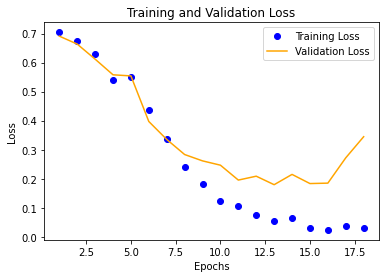

In [ ]:
#@title Let's see the training and validation accuracy by epoch { run: "auto", display-mode: "form" }
import matplotlib.pyplot as plt
history_dict = history.history
value = 'loss' #@param ['loss','accuracy']
loss_values = history_dict[value] # you can change this
val_loss_values = history_dict['val_'+value] # you can also change this
epochs = range(1, len(loss_values) + 1) #acc wasn't defined before
plt.plot(epochs, loss_values, 'bo', label='Training {}'.format(value.title()))
plt.plot(epochs, val_loss_values, 'orange', label='Validation {}'.format(value.title()))
plt.title('Training and Validation {}'.format(value.title()))
plt.xlabel('Epochs')
plt.ylabel('{}'.format(value.title()))
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

preds_val = model.predict(val_generator,val_generator.samples//50)

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        74
           1       0.55      0.51      0.53        75

    accuracy                           0.54       149
   macro avg       0.54      0.54      0.54       149
weighted avg       0.54      0.54      0.54       149

Confusion Matrix:



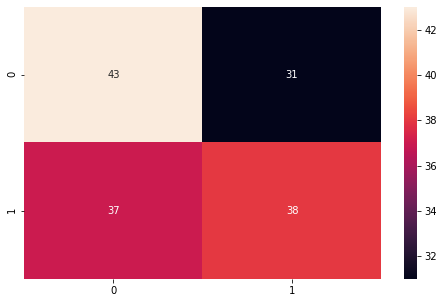

In [ ]:
preds = [int(item>np.mean(preds_val)) for  item in preds_val]
print(classification_report(val_generator.classes, preds))
matrix = confusion_matrix(val_generator.classes, preds)
matrix = pd.DataFrame(matrix)
print('Confusion Matrix:\n')
plt.subplots(figsize=(8,5))
sns.heatmap(matrix,annot=True,fmt='d')